<a href="https://colab.research.google.com/github/Leegyehong/Python_Master/blob/main/Deep_Learning_Introductory_4%EC%9E%A5/Logistic_Regression_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [ ]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

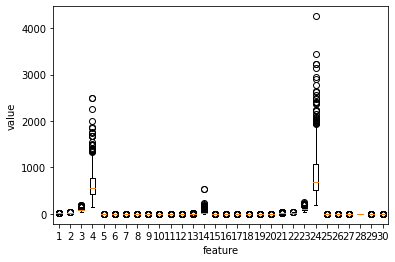

In [ ]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [ ]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [ ]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [ ]:
x = cancer.data
y = cancer.target

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

In [ ]:
class LogisticNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x*self.w) + self.b
    return z
  
  def backprop(self, x, err):
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad 

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad

  def activation(self, z):
    a = 1/(1+np.exp(-z))
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a > 0.5

In [ ]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


In [ ]:
np.mean(neuron.predict(x_test)==y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


0.8245614035087719

In [ ]:
class SingleLayer:
  
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    z = np.sum(x*self.w) + self.b
    return z
  
  def backprop(self, x, err):
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad 

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad
        self.b -= b_grad

        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))

  def activation(self, z):
    z = np.clip(z, -100, None)
    a = 1 / (1+np.exp(-z))
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0
  
  def score(self, x, y):
    return np.mean(self.predict(x)==y)

In [ ]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.9385964912280702

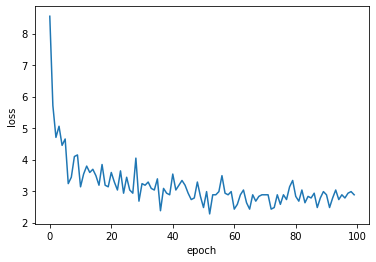

In [ ]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

In [ ]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [ ]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
print(y_test[0:10])

[0 1 0 1 0 1 1 0 0 0]
